In [30]:
import numpy as np
import pandas as pd

file = 'data.csv'
df = pd.read_csv(file)
print(df.head())

   customer_id  vintage  age gender  dependents     occupation    city  \
0            1     2101   66   Male         0.0  self_employed   187.0   
1            2     2348   35   Male         0.0  self_employed     NaN   
2            4     2194   31   Male         0.0       salaried   146.0   
3            5     2329   90    NaN         NaN  self_employed  1020.0   
4            6     1579   42   Male         2.0  self_employed  1494.0   

   customer_nw_category  branch_code  current_balance  ...  \
0                     2          755          1458.71  ...   
1                     2         3214          5390.37  ...   
2                     2           41          3913.16  ...   
3                     2          582          2291.91  ...   
4                     3          388           927.72  ...   

   average_monthly_balance_prevQ  average_monthly_balance_prevQ2  \
0                        1458.71                         1449.07   
1                        7799.26              

In [31]:
df['last_transaction'] = pd.to_datetime(df['last_transaction'], errors='coerce')

In [32]:
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)
df = df.dropna()
print("\nDrop rows with null values:")
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 28361
Number of columns: 21

Drop rows with null values:
Number of rows: 22049
Number of columns: 21


In [33]:
from datetime import datetime

# Convert 'last_transaction' column to datetime format
df['last_transaction'] = pd.to_datetime(df['last_transaction'])

# Calculate the number of days since the last transaction
current_date = datetime.now()
df['days_since_last_transaction'] = (current_date - df['last_transaction']).dt.days

# Drop 'last_transaction' column as it's no longer needed
df = df.drop('last_transaction', axis=1)

# Display the head of the DataFrame with the new column
print(df.head())

   customer_id  vintage  age  gender  dependents     occupation    city  \
0            1     2101   66    Male         0.0  self_employed   187.0   
4            6     1579   42    Male         2.0  self_employed  1494.0   
5            7     1923   42  Female         0.0  self_employed  1096.0   
6            8     2048   72    Male         0.0        retired  1020.0   
7            9     2009   46    Male         0.0  self_employed   623.0   

   customer_nw_category  branch_code  current_balance  ...  \
0                     2          755          1458.71  ...   
4                     3          388           927.72  ...   
5                     2         1666         15202.20  ...   
6                     1            1          7006.93  ...   
7                     2          317         10096.58  ...   

   average_monthly_balance_prevQ  average_monthly_balance_prevQ2  \
0                        1458.71                         1449.07   
4                        1643.31        

In [34]:
# Convert 'gender' and 'occupation' columns to categorical type (optional but recommended)
df['gender'] = df['gender'].astype('category')
df['occupation'] = df['occupation'].astype('category')

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['gender', 'occupation'], drop_first=True)

# Display the head of the encoded DataFrame
print(df_encoded.head())

   customer_id  vintage  age  dependents    city  customer_nw_category  \
0            1     2101   66         0.0   187.0                     2   
4            6     1579   42         2.0  1494.0                     3   
5            7     1923   42         0.0  1096.0                     2   
6            8     2048   72         0.0  1020.0                     1   
7            9     2009   46         0.0   623.0                     2   

   branch_code  current_balance  previous_month_end_balance  \
0          755          1458.71                     1458.71   
4          388           927.72                     1401.72   
5         1666         15202.20                    16059.34   
6            1          7006.93                     7714.19   
7          317         10096.58                     8519.53   

   average_monthly_balance_prevQ  ...  previous_month_debit  \
0                        1458.71  ...                  0.20   
4                        1643.31  ...             

In [35]:
# Display general statistics of the DataFrame rounded to 2 decimal places
statistics_df = df.describe().round(2)

# Display the first few rows of the rounded DataFrame
print(statistics_df)

       customer_id   vintage       age  dependents      city  \
count     22049.00  22049.00  22049.00    22049.00  22049.00   
mean      15112.23   2090.38     47.93        0.38    800.23   
std        8738.14    273.47     16.39        1.04    431.47   
min           1.00     73.00      1.00        0.00      0.00   
25%        7519.00   1957.00     36.00        0.00    409.00   
50%       15113.00   2153.00     46.00        0.00    848.00   
75%       22684.00   2292.00     60.00        0.00   1096.00   
max       30301.00   2476.00     90.00       52.00   1649.00   

       customer_nw_category  branch_code  current_balance  \
count              22049.00     22049.00         22049.00   
mean                   2.21       874.44          7137.71   
std                    0.67       904.28         20275.81   
min                    1.00         1.00         -5503.96   
25%                    2.00       159.00          1786.13   
50%                    2.00       531.00          3337.24

In [36]:
statistics_df

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,days_since_last_transaction
count,22049.00,22049.00,22049.00,22049.00,22049.00,22049.00,22049.00,22049.00,22049.00,22049.00,22049.00,22049.00,22049.00,22049.00,22049.00,22049.00,22049.00,22049.00,22049.00
mean,15112.23,2090.38,47.93,0.38,800.23,2.21,874.44,7137.71,7226.02,7185.33,6692.89,3332.01,3755.80,3684.06,3690.69,7170.32,7184.56,0.19,1578.98
std,8738.14,273.47,16.39,1.04,431.47,0.67,904.28,20275.81,21058.19,19278.60,17093.70,25977.68,32483.50,25157.26,25086.02,19597.19,20984.60,0.39,84.15
min,1.00,73.00,1.00,0.00,0.00,1.00,1.00,-5503.96,-2998.64,1428.69,-16506.10,0.01,0.01,0.01,0.01,-3374.18,-5171.92,0.00,1512.00
25%,7519.00,1957.00,36.00,0.00,409.00,2.00,159.00,1786.13,1907.46,2210.53,1818.36,0.36,0.37,0.47,0.49,2032.11,2091.31,0.00,1523.00
50%,15113.00,2153.00,46.00,0.00,848.00,2.00,531.00,3337.24,3428.88,3595.13,3381.31,1.10,6.31,214.70,227.24,3503.83,3509.02,0.00,1540.00
75%,22684.00,2292.00,60.00,0.00,1096.00,3.00,1374.00,6808.07,6829.84,6819.94,6635.03,987.30,1128.76,1574.44,1638.75,6859.96,6781.01,0.00,1602.00
max,30301.00,2476.00,90.00,52.00,1649.00,3.00,4782.00,1076091.29,1001123.73,1192704.04,856596.51,1764285.97,2361808.29,1764285.97,1414168.06,1074624.64,1326486.64,1.00,1877.00


In [37]:
# Calculate counts for each categorical variable
counts = df_encoded[['gender_Male', 'occupation_retired', 'occupation_salaried', 'occupation_self_employed', 'occupation_student', 'churn', 'customer_nw_category']].sum()

# Calculate proportions for each categorical variable
proportions = counts / len(df_encoded)

# Create a DataFrame to display the counts and proportions
categorical_stats = pd.DataFrame({
    'Counts': counts,
    'Proportions (Relative Frequency)': proportions
})

# Display the statistics for categorical variables
print(categorical_stats)

                          Counts  Proportions (Relative Frequency)
gender_Male                13407                          0.608055
occupation_retired          1636                          0.074198
occupation_salaried         5599                          0.253934
occupation_self_employed   13421                          0.608690
occupation_student          1369                          0.062089
churn                       4265                          0.193433
customer_nw_category       48781                          2.212391


In [38]:
categorical_stats

,Counts,Proportions (Relative Frequency)
gender_Male,13407,0.608055
occupation_retired,1636,0.074198
occupation_salaried,5599,0.253934
occupation_self_employed,13421,0.608690
occupation_student,1369,0.062089
churn,4265,0.193433
customer_nw_category,48781,2.212391


In [39]:
# Replace 'branch_code' with the actual column name in your DataFrame
branch_counts = df_encoded['customer_nw_category'].value_counts()
branch_proportions = branch_counts / len(df_encoded)

# Create a DataFrame to display the counts and proportions for 'branch_code'
branch_stats = pd.DataFrame({
    'Counts': branch_counts,
    'Proportions (Relative Frequency)': branch_proportions
})

# Display the statistics for 'branch_code'
print(branch_stats)

                      Counts  Proportions (Relative Frequency)
customer_nw_category                                          
2                      11170                          0.506599
3                       7781                          0.352896
1                       3098                          0.140505


In [40]:
# Replace 'branch_code' with the actual column name in your DataFrame
branch_counts = df_encoded['branch_code'].value_counts()
branch_proportions = branch_counts / len(df_encoded)

# Create a DataFrame to display the counts and proportions for 'branch_code'
branch_stats = pd.DataFrame({
    'Counts': branch_counts,
    'Proportions (Relative Frequency)': branch_proportions
})

# Display the statistics for 'branch_code'
print(branch_stats)

             Counts  Proportions (Relative Frequency)
branch_code                                          
19              124                          0.005624
6               120                          0.005442
60              104                          0.004717
16               92                          0.004173
8                84                          0.003810
...             ...                               ...
2413              1                          0.000045
3318              1                          0.000045
2382              1                          0.000045
2329              1                          0.000045
4104              1                          0.000045

[2887 rows x 2 columns]


In [41]:
from sklearn.model_selection import train_test_split
seed = 18
x = df_encoded.dropna().drop(['churn', 'customer_id'], axis=1)
y = df_encoded['churn']  
feature_names = x.columns
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=seed)
print("Number of rows in the training set (x_train):", x_train.shape[0])
print("Number of rows in the testing set (x_test):", x_test.shape[0])
print("Number of rows in the training set (y_train):", y_train.shape[0])
print("Number of rows in the testing set (y_test):", y_test.shape[0])

Number of rows in the training set (x_train): 13229
Number of rows in the testing set (x_test): 8820
Number of rows in the training set (y_train): 13229
Number of rows in the testing set (y_test): 8820


In [42]:
print(y_test)

24384    0
3649     0
22436    0
2626     0
16843    0
        ..
25605    1
19476    0
15625    0
3441     0
575      0
Name: churn, Length: 8820, dtype: int64


In [43]:
# Create DataFrames for x_train, x_test, y_train, and y_test
df_x_train = pd.DataFrame(x_train, columns=x.columns)  # assuming x is a DataFrame
df_x_test = pd.DataFrame(x_test, columns=x.columns)
df_y_train = pd.DataFrame(y_train, columns=['churn'])  # assuming y is a Series or 1D array
df_y_test = pd.DataFrame(y_test, columns=['churn'])

# Specify file paths for CSV export
x_train_file_path = 'x_train.csv'
x_test_file_path = 'x_test.csv'
y_train_file_path = 'y_train.csv'
y_test_file_path = 'y_test.csv'

# Export DataFrames to CSV files
df_x_train.to_csv(x_train_file_path, index=False)
df_x_test.to_csv(x_test_file_path, index=False)
df_y_train.to_csv(y_train_file_path, index=False)
df_y_test.to_csv(y_test_file_path, index=False)

### Neural Network

CHAT GPT: https://chat.openai.com/share/57270119-700f-4878-b12c-b8d21c472fab 

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Check if a GPU is available and move tensors to GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming x_train, y_train, x_test, y_test are your training and testing data
# Standardize the features (optional but recommended for neural networks)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Convert NumPy arrays to PyTorch tensors and move to GPU
train_x_tensor = torch.FloatTensor(x_train).to(device)
train_y_tensor = torch.FloatTensor(y_train.values).view(-1, 1).to(device)  # Convert to NumPy array
test_x_tensor = torch.FloatTensor(x_test).to(device)

# Convert y_test to NumPy array and then to PyTorch tensor
test_y_tensor = torch.FloatTensor(y_test.values).view(-1, 1).to(device)  # Convert to NumPy array

# Create a custom neural network class
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(x_train.shape[1], 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 32)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(32, 1)
        self.sigmoid = nn.Sigmoid()  # Add a sigmoid activation for binary classification

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)  # Apply sigmoid activation for binary classification
        return x

# Instantiate the model and move to GPU
model = SimpleNN().to(device)

# Define the loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.005)

# Convert data to DataLoader for batching, with pin_memory=True
train_data = TensorDataset(train_x_tensor, train_y_tensor)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)

# Training loop
epochs = 30
for epoch in range(epochs):
    model.train()
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()


model.eval()

SimpleNN(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=22, out_features=64, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


For Threshold: 0.2
Specificity: 0.8167
Sensitivity: 0.6688
Test Accuracy: 78.79%
Precision: 0.4694
Recall: 0.6688

For Threshold: 0.5
Specificity: 0.9486
Sensitivity: 0.4282
Test Accuracy: 84.71%
Precision: 0.6688
Recall: 0.4282

For Threshold: 0.7
Specificity: 0.9786
Sensitivity: 0.2481
Test Accuracy: 83.61%
Precision: 0.7375
Recall: 0.2481


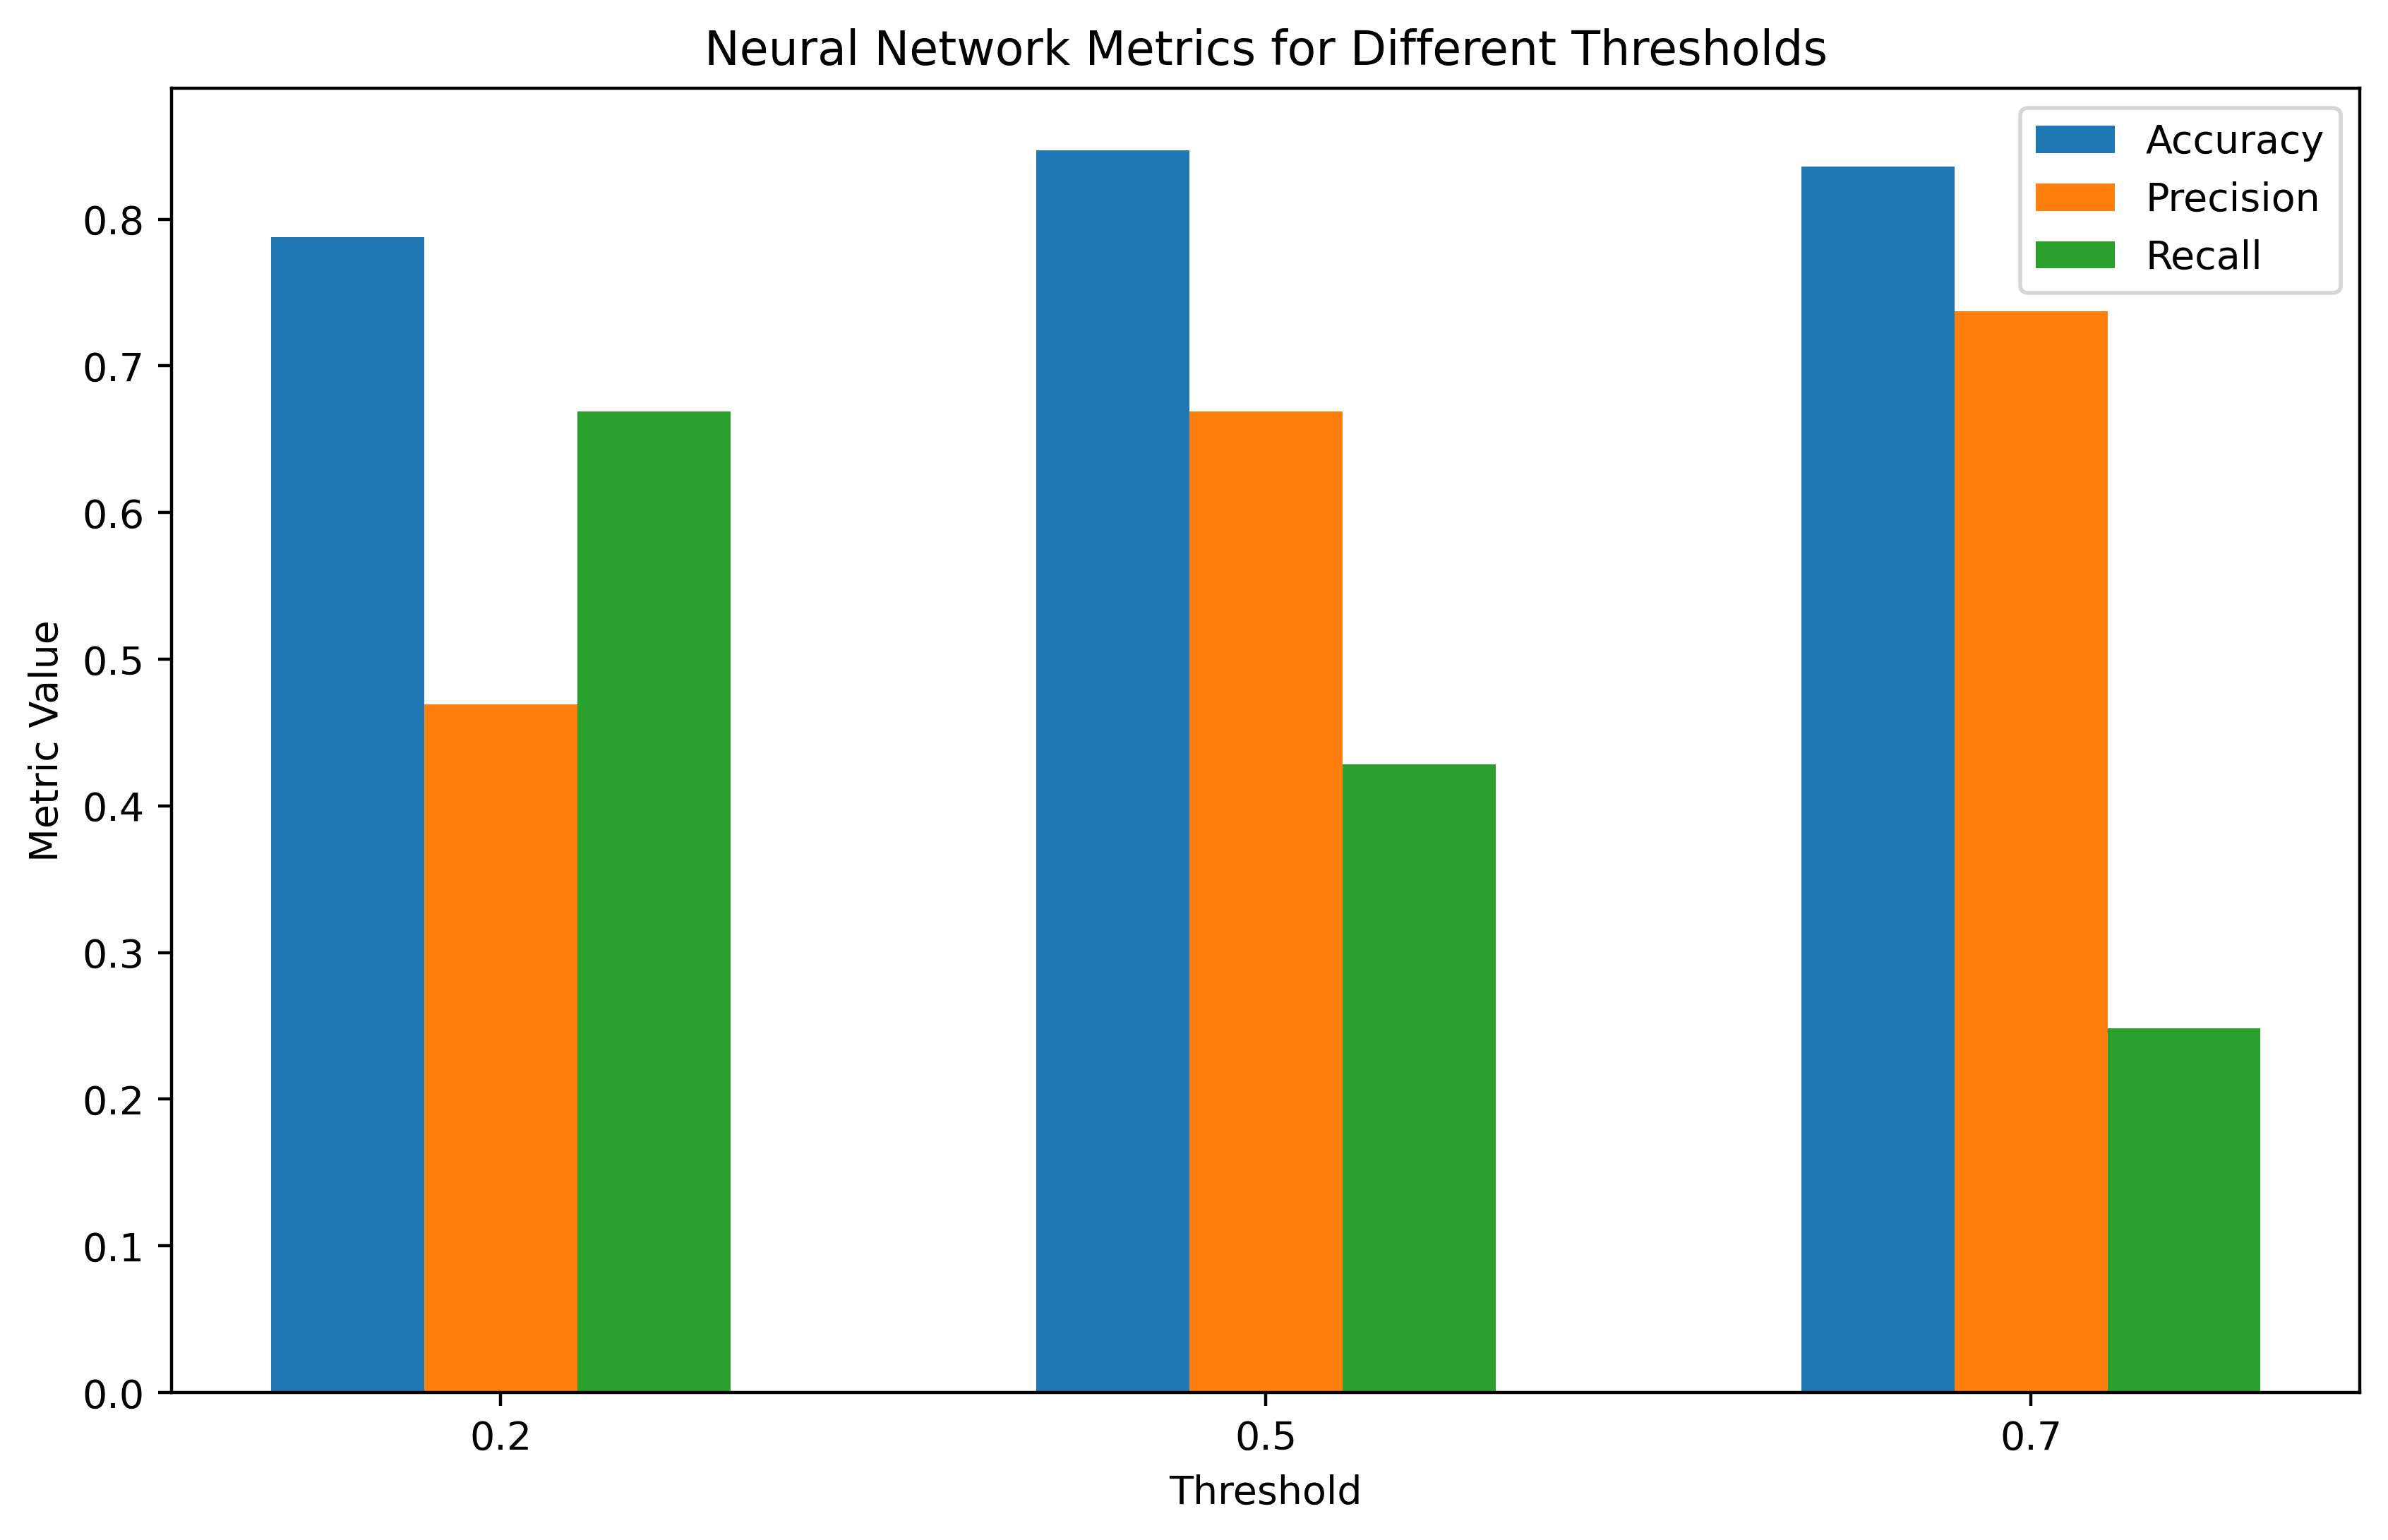

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store metric values for different thresholds
thresholds = [0.2, 0.5, 0.7]
accuracy_values = []
precision_values = []
recall_values = []

for threshold in thresholds:
    with torch.no_grad():
        test_outputs = model(test_x_tensor)
        nn_y_prob = torch.nn.functional.sigmoid(test_outputs).cpu().numpy().flatten()
        predictions = (test_outputs >= threshold).float()

        # Convert predictions and labels to numpy arrays
        predictions_np = predictions.cpu().numpy().flatten()
        test_y_np = test_y_tensor.cpu().numpy().flatten()
        # Confusion matrix
        cm = confusion_matrix(y_test, predictions_np)

        # Calculate specificity and sensitivity
        true_negative = cm[0, 0]
        false_positive = cm[0, 1]
        false_negative = cm[1, 0]
        true_positive = cm[1, 1]

        specificity = true_negative / (true_negative + false_positive)
        sensitivity = true_positive / (true_positive + false_negative)

        # Calculate metrics
        accuracy = accuracy_score(test_y_np, predictions_np)
        precision = precision_score(test_y_np, predictions_np)
        recall = recall_score(test_y_np, predictions_np)

        # Append metric values to lists
        accuracy_values.append(accuracy)
        precision_values.append(precision)
        recall_values.append(recall)

        # Print metrics
        print(f'\nFor Threshold: {threshold}')
        print(f'Specificity: {specificity:.4f}')
        print(f'Sensitivity: {sensitivity:.4f}')
        print(f'Test Accuracy: {accuracy * 100:.2f}%')
        print(f'Precision: {precision:.4f}')
        print(f'Recall: {recall:.4f}')
        # Add more print statements if needed (F1 Score, Confusion Matrix, Specificity, Sensitivity)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6), dpi=400)  # Set higher dpi for increased resolution

bar_width = 0.2
bar_positions = np.arange(len(thresholds))

# Bar plots for accuracy, precision, and recall
ax.bar(bar_positions - bar_width, accuracy_values, bar_width, label='Accuracy')
ax.bar(bar_positions, precision_values, bar_width, label='Precision')
ax.bar(bar_positions + bar_width, recall_values, bar_width, label='Recall')

# Set labels and title
ax.set_xticks(bar_positions)
ax.set_xticklabels(thresholds)
ax.set_xlabel('Threshold')
ax.set_ylabel('Metric Value')
ax.set_title('Neural Network Metrics for Different Thresholds')
ax.legend()

# Save the plot with higher resolution
plt.savefig('neural_network_metrics_plot.png', dpi=300)

# Show the plot
plt.show()


In [46]:
# Extract the weights from the first layer
weights_first_layer = model.fc1.weight.detach().numpy()

weights_df = pd.DataFrame({'Feature': feature_names, 'Weight': weights_first_layer[0]})

# Display the DataFrame
print(weights_df)

                           Feature    Weight
0                          vintage -0.203304
1                              age -0.196323
2                       dependents -0.127010
3                             city  0.075519
4             customer_nw_category -0.137065
5                      branch_code -0.456122
6                  current_balance -0.390964
7       previous_month_end_balance -0.047769
8    average_monthly_balance_prevQ -1.962478
9   average_monthly_balance_prevQ2  0.591793
10            current_month_credit -0.238090
11           previous_month_credit  0.231253
12             current_month_debit  0.394150
13            previous_month_debit -0.315764
14           current_month_balance  0.038498
15          previous_month_balance -0.280923
16     days_since_last_transaction -1.066016
17                     gender_Male  0.085199
18              occupation_retired  0.132822
19             occupation_salaried -0.037867
20        occupation_self_employed -0.163564
21        

In [47]:
# Sort the weights DataFrame by absolute values of weights
weights_df['Absolute Weight'] = weights_df['Weight'].abs()
sorted_weights_df = weights_df.sort_values(by='Absolute Weight', ascending=False)

# Display the top 5 features
top5_features_nn = sorted_weights_df.head(5)
print("Top 5 Relevant Features:")
print(top5_features_nn[['Feature', 'Weight']])

Top 5 Relevant Features:
                           Feature    Weight
8    average_monthly_balance_prevQ -1.962478
16     days_since_last_transaction -1.066016
21              occupation_student -0.606380
9   average_monthly_balance_prevQ2  0.591793
5                      branch_code -0.456122


Here's what positive and negative coefficients typically mean:

Positive Coefficient:

A positive weight for a feature means that an increase in the value of that feature is associated with an increase in the output (activation) of the neuron it is connected to.
In the context of the first layer, where input features are connected to neurons, a positive weight suggests that an increase in the value of the corresponding feature contributes positively to the activation of the neuron.

Negative Coefficient:

A negative weight for a feature means that an increase in the value of that feature is associated with a decrease in the output (activation) of the neuron it is connected to.
In the first layer, a negative weight suggests that an increase in the value of the corresponding feature contributes negatively to the activation of the neuron.

### SVM 

In [48]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

svm_model = SVC(kernel='linear', C=1.0, random_state=42, probability=True)
svm_model.fit(x_train_scaled, y_train)

svm_probabilities = svm_model.predict_proba(x_test_scaled)[:, 1]


For SVM Threshold: 0.2
Specificity: 0.8996
Sensitivity: 0.5677
Confusion Matrix:
[[6386  713]
 [ 744  977]]
Test Accuracy: 83.48%
Precision: 0.5781
Recall: 0.5677

For SVM Threshold: 0.5
Specificity: 0.9992
Sensitivity: 0.0145
Confusion Matrix:
[[7093    6]
 [1696   25]]
Test Accuracy: 80.70%
Precision: 0.8065
Recall: 0.0145

For SVM Threshold: 0.7
Specificity: 0.9997
Sensitivity: 0.0070
Confusion Matrix:
[[7097    2]
 [1709   12]]
Test Accuracy: 80.60%
Precision: 0.8571
Recall: 0.0070


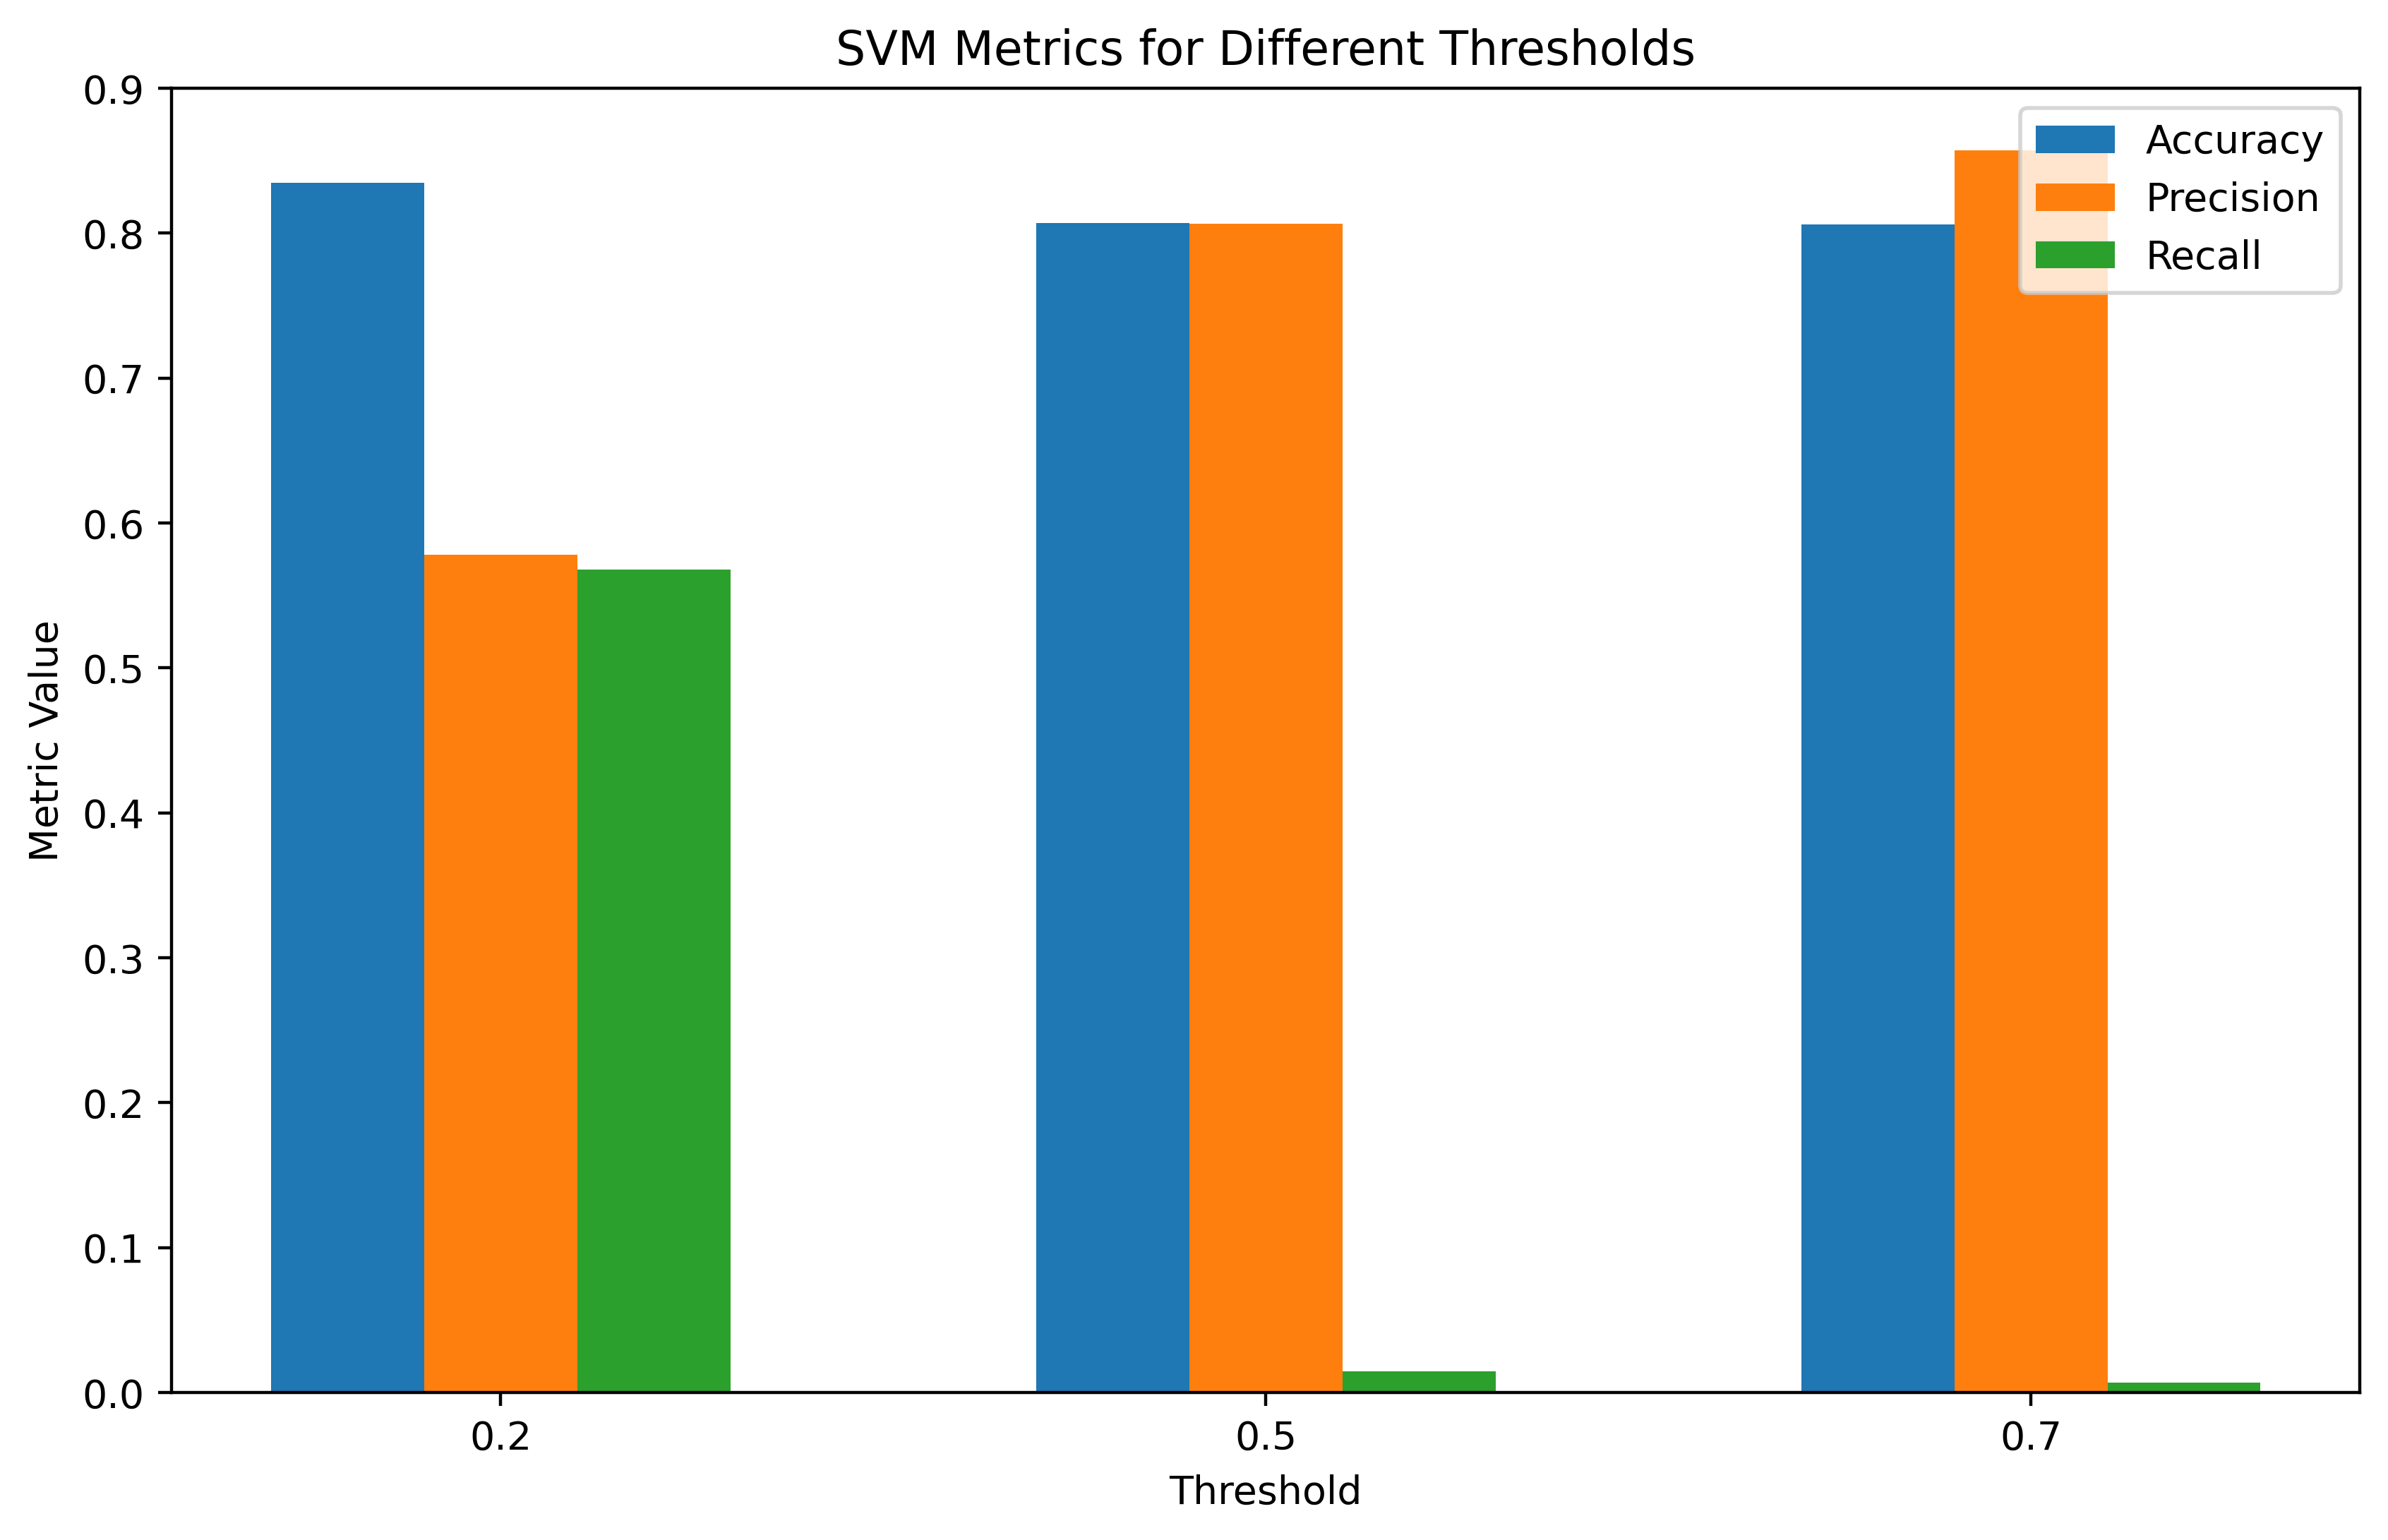

In [49]:
import matplotlib.pyplot as plt
import numpy as np

# Define multiple thresholds
thresholds = [0.2, 0.5, 0.7]

# Initialize lists to store metric values
accuracy_values = []
precision_values = []
recall_values = []

for threshold in thresholds:
    # Apply the threshold to convert probabilities into binary predictions
    svm_predictions = (svm_probabilities >= threshold).astype(int)

    # Confusion matrix
    cm = confusion_matrix(y_test, svm_predictions)

    # Calculate specificity and sensitivity
    true_negative = cm[0, 0]
    false_positive = cm[0, 1]
    false_negative = cm[1, 0]
    true_positive = cm[1, 1]

    specificity = true_negative / (true_negative + false_positive)
    sensitivity = true_positive / (true_positive + false_negative)


    # Calculate metrics
    svm_accuracy = accuracy_score(y_test, svm_predictions)
    svm_precision = precision_score(y_test, svm_predictions)
    svm_recall = recall_score(y_test, svm_predictions)

    # Append metric values to lists
    accuracy_values.append(svm_accuracy)
    precision_values.append(svm_precision)
    recall_values.append(svm_recall)

    # Print metrics
    print(f'\nFor SVM Threshold: {threshold}')
    print(f'Specificity: {specificity:.4f}')
    print(f'Sensitivity: {sensitivity:.4f}')
    
    # Print confusion matrix
    print(f'Confusion Matrix:\n{cm}')

    print(f'Test Accuracy: {svm_accuracy * 100:.2f}%')
    print(f'Precision: {svm_precision:.4f}')
    print(f'Recall: {svm_recall:.4f}')
    # Add more print statements if needed (F1 Score, Confusion Matrix, Specificity, Sensitivity)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6), dpi=400)

bar_width = 0.2
bar_positions = np.arange(len(thresholds))

# Bar plots for accuracy, precision, and recall
ax.bar(bar_positions - bar_width, accuracy_values, bar_width, label='Accuracy')
ax.bar(bar_positions, precision_values, bar_width, label='Precision')
ax.bar(bar_positions + bar_width, recall_values, bar_width, label='Recall')

# Set labels and title
ax.set_xticks(bar_positions)
ax.set_xticklabels(thresholds)
ax.set_xlabel('Threshold')
ax.set_ylabel('Metric Value')
ax.set_title('SVM Metrics for Different Thresholds')
ax.legend()

# Show the plot
plt.show()


In [51]:
coefficients = svm_model.coef_
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients[0]})

# Display the DataFrame
print(coefficients_df)


                           Feature  Coefficient
0                          vintage     0.000021
1                              age    -0.000994
2                       dependents     0.000191
3                             city    -0.000144
4             customer_nw_category     0.001736
5                      branch_code     0.000935
6                  current_balance    -0.261360
7       previous_month_end_balance     0.010895
8    average_monthly_balance_prevQ     0.199397
9   average_monthly_balance_prevQ2    -0.001144
10            current_month_credit    -0.017453
11           previous_month_credit    -0.001430
12             current_month_debit     0.013953
13            previous_month_debit     0.007079
14           current_month_balance     0.029027
15          previous_month_balance     0.002237
16     days_since_last_transaction     0.000076
17                     gender_Male     0.000014
18              occupation_retired    -0.000060
19             occupation_salaried    -0

Positive Coefficient: A positive coefficient for a feature means that an increase in the value of that feature is associated with the prediction of the positive class (or class 1 in binary classification).

Negative Coefficient: Conversely, a negative coefficient for a feature means that an increase in the value of that feature is associated with the prediction of the negative class (or class 0 in binary classification).

In [52]:
# Sort the coefficients DataFrame by absolute values of coefficients
coefficients_df['Absolute Coefficient'] = coefficients_df['Coefficient'].abs()
sorted_coefficients_df = coefficients_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the top 5 features
top5_features = sorted_coefficients_df.head(5)
print("Top 5 Features:")
print(top5_features[['Feature', 'Coefficient']])


Top 5 Features:
                          Feature  Coefficient
6                 current_balance    -0.261360
8   average_monthly_balance_prevQ     0.199397
14          current_month_balance     0.029027
10           current_month_credit    -0.017453
12            current_month_debit     0.013953


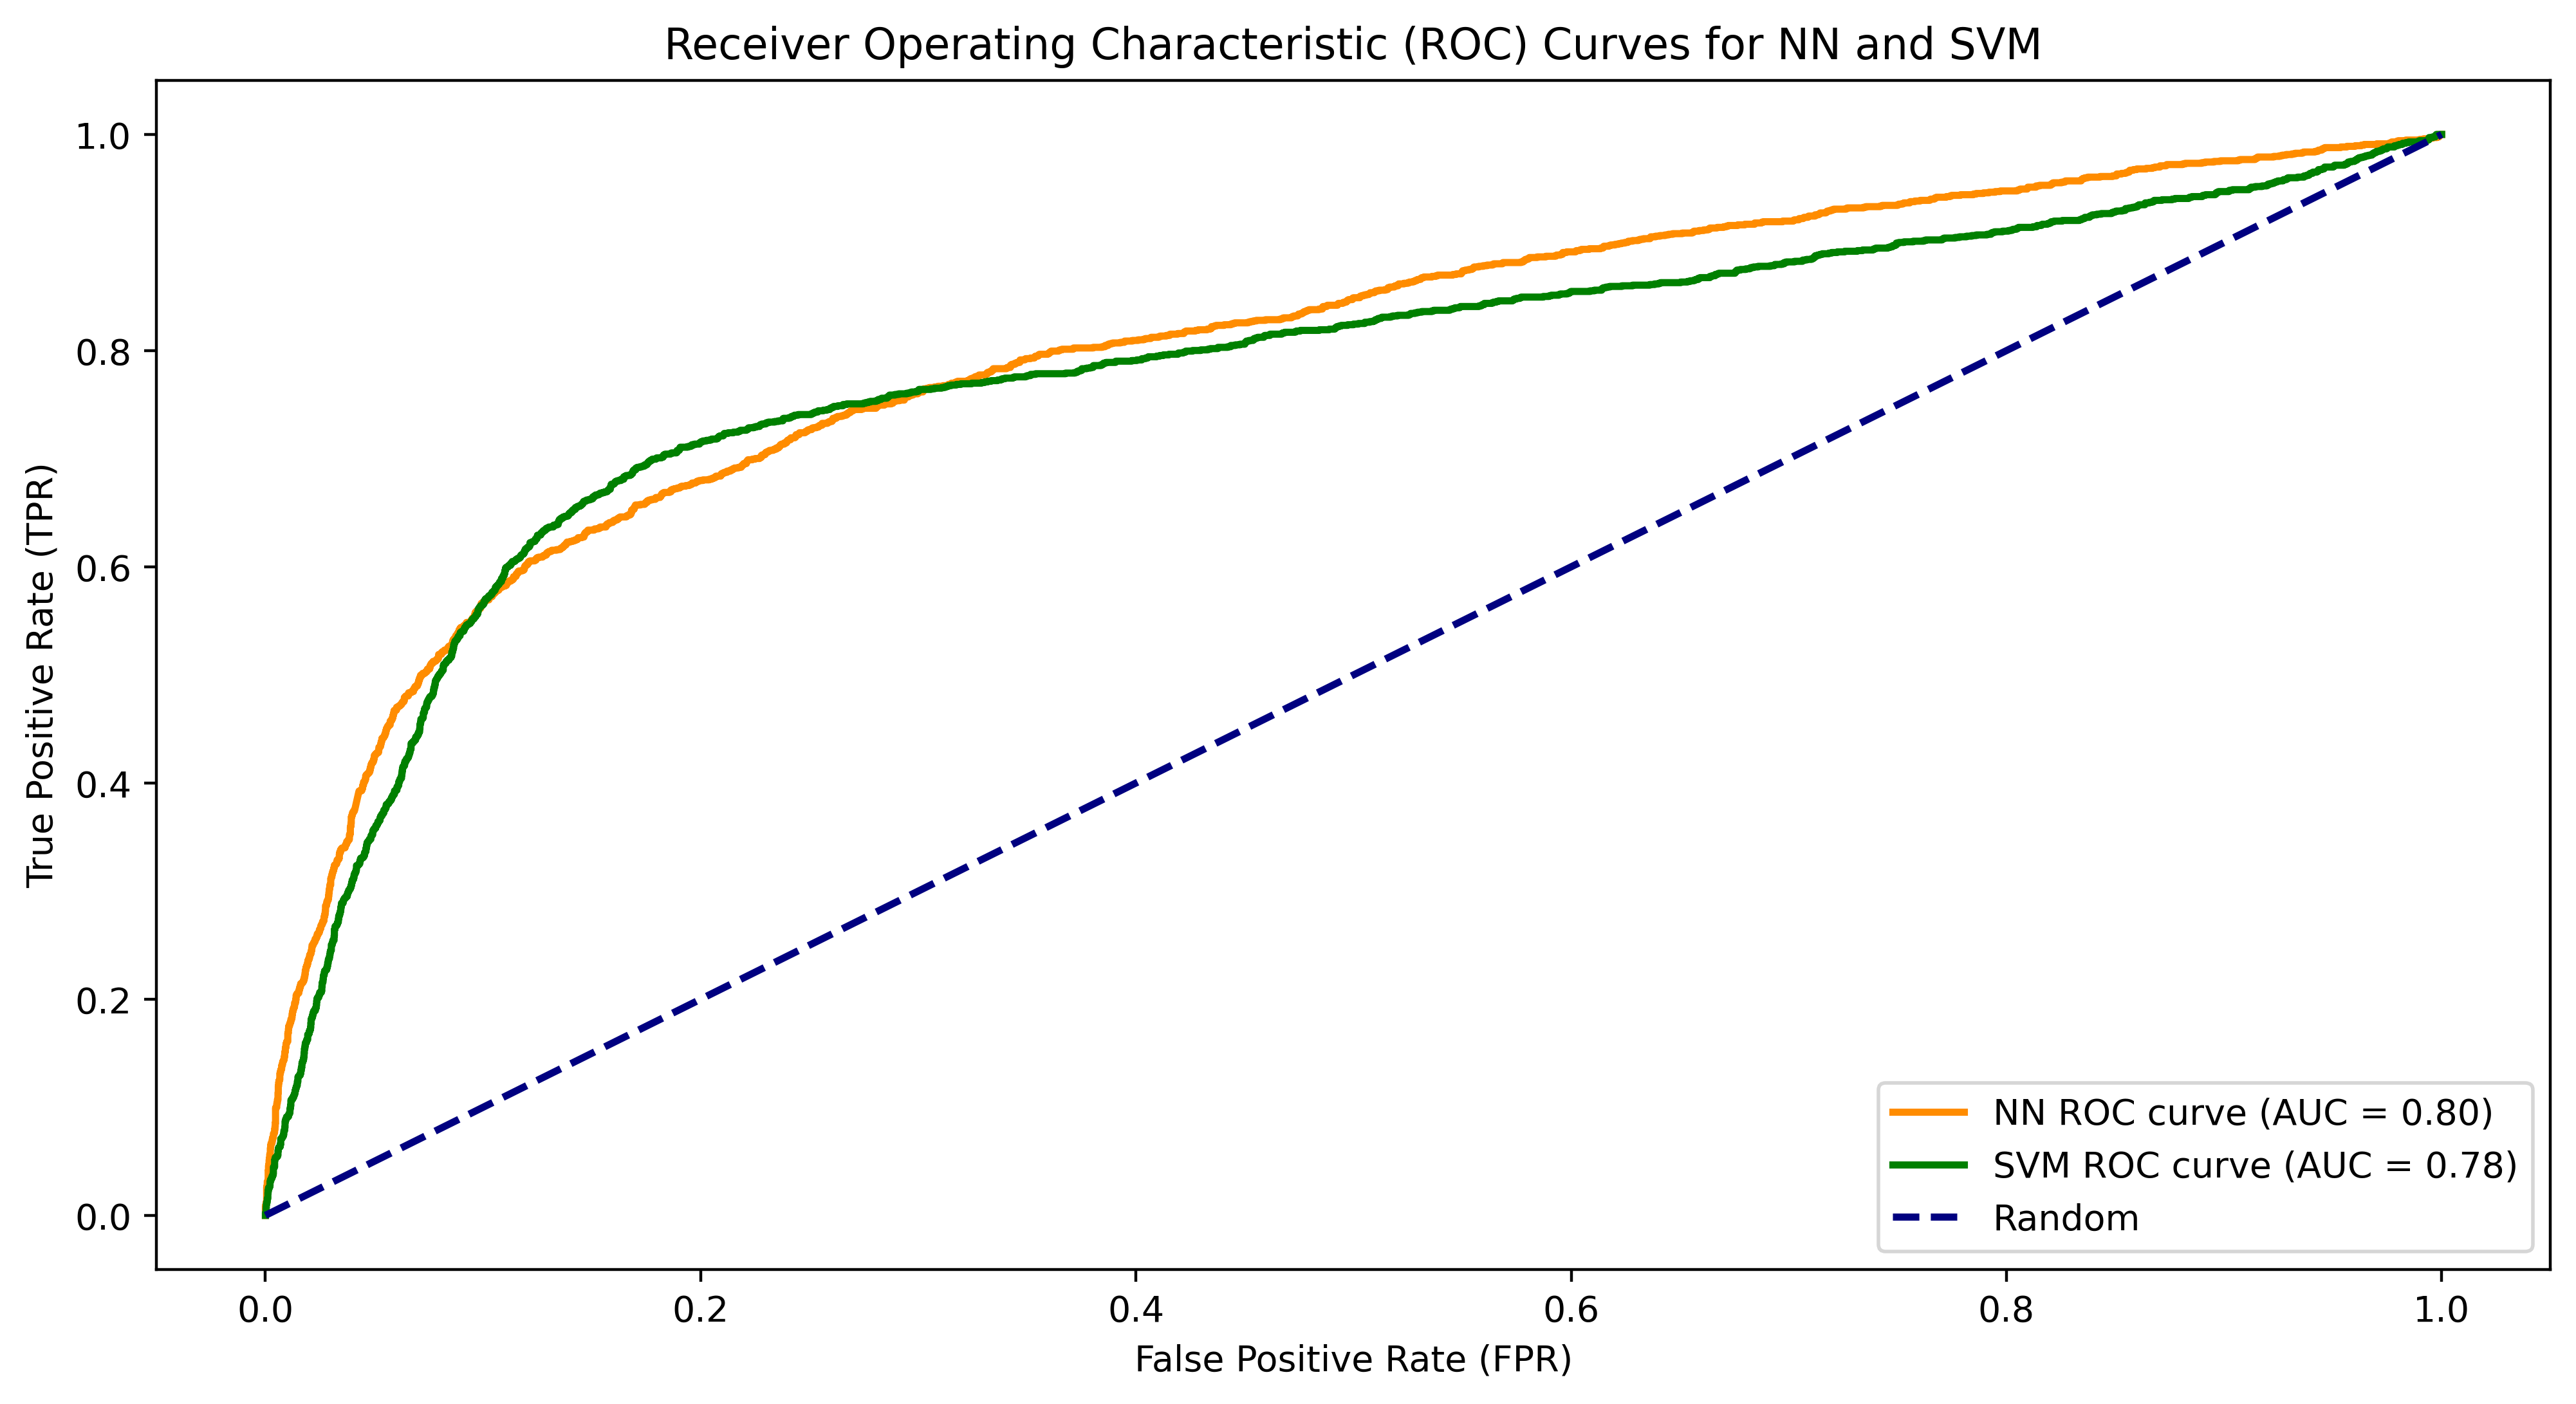

In [57]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC for Neural Network
nn_fpr, nn_tpr, nn_thresholds = roc_curve(y_test, nn_y_prob)
nn_roc_auc = auc(nn_fpr, nn_tpr)

# Compute ROC curve and AUC for SVM
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_probabilities)
svm_roc_auc = auc(svm_fpr, svm_tpr)

# Plot ROC curves for both models
plt.figure(figsize=(12, 6),dpi=400)
plt.plot(nn_fpr, nn_tpr, color='darkorange', lw=2, label=f'NN ROC curve (AUC = {nn_roc_auc:.2f})')
plt.plot(svm_fpr, svm_tpr, color='green', lw=2, label=f'SVM ROC curve (AUC = {svm_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curves for NN and SVM')
plt.legend(loc='lower right')
plt.show()